**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Brian Dinh
- Candy Zhang
- Edwin Liang
- Sindhu Kothe
- Vaishnavi Ramanujan

# Research Question

What is the relationship between the rate of diabetes and individual-specific body conditions? Would lifestyle choices such as smoking, drinking, and an unhealthy diet affect the risk of diabetes? What are the effects of income on the rate of diabetes? 

## Background and Prior Work

Diabetes is an autoimmune disorder that affects an overwhelming number of people in the United States. For this reason, it is paramount that we be able to predict whether or not an individual is at risk of developing diabetes given a set amount of information. 

We found that there is prior research<a name="diabetes-rate"></a>[<sup>1</sup>](#dia-rate) exploring the mortality rate in people with type 2 diabetes. From this, we can see that the mortality rate of people with type 2 diabetes has been increasing as they grow older. The research paper in this reference talks about predicting 5 year mortality rates for people with a higher age with diabetes. This would help predict if an immediate intervention is required. We also discovered that there is a clear correlation between diabetes and gender. According to one study <a name="diabetes-gender"></a>[<sup>2</sup>](#dia-gender), the population of older people that were diagnosed with diabetes is overwhelmingly male. On the other hand,lower risk populations that were studied show an overwhelming female bias. However, we see that when the population with diabetes amongst the younger age groups were studied, there was a pretty even split between both the sexes.

Furthermore, we see that there is in fact a correlation between substances usage and the risk of diabetes. According to one study by the NCBI <a name="diabetes-smoke"></a>[<sup>3</sup>](#dia-smoke) (National Center for Biotechnology Information), we see that men who smoked around 25 cigarettes daily were at greater risk of diabetes. Also, men who drank 30.0 - 49.9 grams of alcohol had a higher relative risk of diabetes. However, the study was conducted on only male professionals in the age range of 40 - 75. We also see that the study is relatively old and we don't know how the correlation plays out in today's world. There has also been some research done on the relationship between socioeconomic status including education and income level on diabetes that we hope to further build on with our project. This research<a name="diabetes-income"></a>[<sup>4</sup>](#dia-income) shows that there is a strong correlation between income and type 2 diabetes in Canada and we would like to do research primarily based in the United States. We hope to address the gaps we found in these studies and conduct a more representative anaylsis covering both eating habits and socieconomic conditions.  

1. <a name="dia-rate"></a> [^](#diabetes-rate) *Journal of Diabetes Research*. https://www.hindawi.com/journals/jdr/2024/1741878/
2. <a name="dia-gender"></a> [^](#diabetes-gender) *Diabetologia Journal*. https://link.springer.com/article/10.1007/s001250051573
3. <a name="dia-smoke"></a> [^](#diabetes-smoke) *National Center for Biotechnology Information*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2548937/
4. <a name="dia-income"></a> [^](#diabetes-income) *National Center for Biotechnology Information*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4603875/

# Hypothesis


We expect that a person who smokes, drinks, and has unhealthy eating habits is more likely to be diagnosed with diabetes. We also think there is a correlation between having a lower income and having less access to healthy food. Essentially, we believe that healthy lifestyle choices and socioeconomic equality play important roles in reducing the prevalence of diabetes and its associated risk factors. We expect income inequalities and unhealthy food and lifestyle choices to increase an individual’s risk of developing diabetes. Additionally, proper nutrition and reduced intake of alcohol / smoking will lower the rate of diabetes.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.


Our ideal dataset should include individual-specific body condition variables, as well as whether a person smokes / drinks, their eating habits, and income level. The dataset should ideally contain a large number of observations, preferably thousands, to ensure statistical power and generalizability of findings across one specific group of people. Data can be collected from various sources including hospitals, clinics, medical research institutions, and population-based studies. It is essential to ensure that the data collection process is systematic and standardized to minimize bias and ensure reliability. The dataset should be representative of the population and not skewed towards any demographic. A potential dataset would be https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset as this contains all the variables we do need and more. However, we may need to search for more datasets regarding lifestyle choices and health conditions to further support our hypothesis. 

## Dataset #1: Diabetes Health Indicators Dataset
- Dataset Name: Diabetes Health Indicators Dataset
  - Link to dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
  - Number of observations: 253,680
  - Number of variables: 22
  - Description of important variables:
    - BloodPressure: To express the Blood pressure measurement
    - Heavy Alcohol Consumption: 0 = no heavy alcohol consumption, 1 = heavy alcohol consumption
    - Smoker: 0 = non-smoker, 1 = smoker
    - Insulin: To express the Insulin level in blood
    - BMI: To express the Body mass index
    - Diabetes: If the individual has diabetes, 0 = no diabetes, 1 = prediabetes,  2 = has diabetes
    - Income: On a scale 1-8 1 = less than 10,000 usd a year 5 = less than 35,000 usd per year 8 = 75,000 usd or more per year 
    - Fruits / Veggies: 1 =  consumption of fruits and vegetables at least once per day, 0 = no fruits or veggies
    - Sex: 0 = male, 1 = female
  - Description of Dataset:
    Because all of the important variables and other columns contain only numeric values, we will not need a significant amount of pre-processing for the data. However, for the diabetes column, we plan to merge the prediabetes and the no diabetes column since our goal is to have a binary output on whether a patient has diabetes or not. Additionally, we will also merge the fruits and vegetables columns so that we can further streamline the input variables. The food and veggies column is a proxy for healthy eating and blood pressure, insulin, and heart disease are proxies for individual-specific body conditions.  Because there are no missing values, we would just need to look through the dataset and see if there are outliers, as well as normalize for gender. Because this is a general health survey, we also need to remove unnecessary variables such as if a person has health care or not, difficulty walking up and down stairs, and state of mental health. We plan to merge the two datasets  we have by the diabetes column, as both datasets include whether or not an individual has diabetes.  

In [1]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_df_cleaned = diabetes_df.dropna()
diabetes_df_cleaned

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Dataset #2: LARS/Sklearn dataset

- Dataset Name: Diabetes dataset
- Link to the dataset: https://learn.microsoft.com/en-us/azure/open-datasets/dataset-diabetes?tabs=pyspark
- Number of observations: 442
- Number of variables: 10 \
Description of the dataset: This dataset comprises information gathered from 442 patients diagnosed with diabetes. The dataset includes ten baseline variables that reflect metabolic health and potential risk factors for diabetes. It describes the individual-specific body conditions of the patients.
Important Variables: 
- Age: The age of the patient at the time of data collection 
- Sex: The gender of the patient. Since there is no specific information about what the numbers mean in this column, we decided to drop this column.

- BMI: Body mass index by dividing an adult's weight in kilograms by their height in metres squared
- BP: Average blood pressure given in millimeters of mercury (mmHg)
- S1: Total serum cholesterol given in milligrams per deciliter (mg/dL)
- S2: Low-density lipoproteins level given in milligrams per deciliter (mg/dL)
- S3: High-density lipoproteins level given in milligrams per deciliter (mg/dL)
- S4: Total cholesterol level given in millimoles per liter (mmol/L)
- S5: Possibly log of serum triglycerides level given in millimoles per liter (mmol/L)
- S6: Blood sugar level given in milligrams per deciliter (mg/dL)
- Y: A quantitative measure of disease progression one year after baseline \
All the data in this dataset has already been preprocessed to be numerical. owever, there is no specific information about what the numbers mean in the sex column. We decided to drop this column. We plan to wrangle the data by handling missing values and removing irrelevant columns to our research question. Variables such as BMI (body mass index), S4 (total cholesterol), and S6 (blood sugar level) can be our proxies to determine a person’s lifestyle choices.

In [2]:
# ## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
# ## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

# URL of the text file
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

# Read the text file into a DataFrame
df = pd.read_csv(url, sep='\t')

df_cleaned = df.dropna()
print("\nNull values after cleaning:")
print(df_cleaned.isnull().sum())
#Drop the sex columns for now because we don't know what each label represents
#May keep it around later for EDA to check if diverse
df_cleaned = df_cleaned.drop(columns=['SEX'])
df_cleaned


Null values after cleaning:
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...
437,60,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - Dataset 1
Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Get means, medians, and spread
statistics = diabetes_df_cleaned.describe()
statistics

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


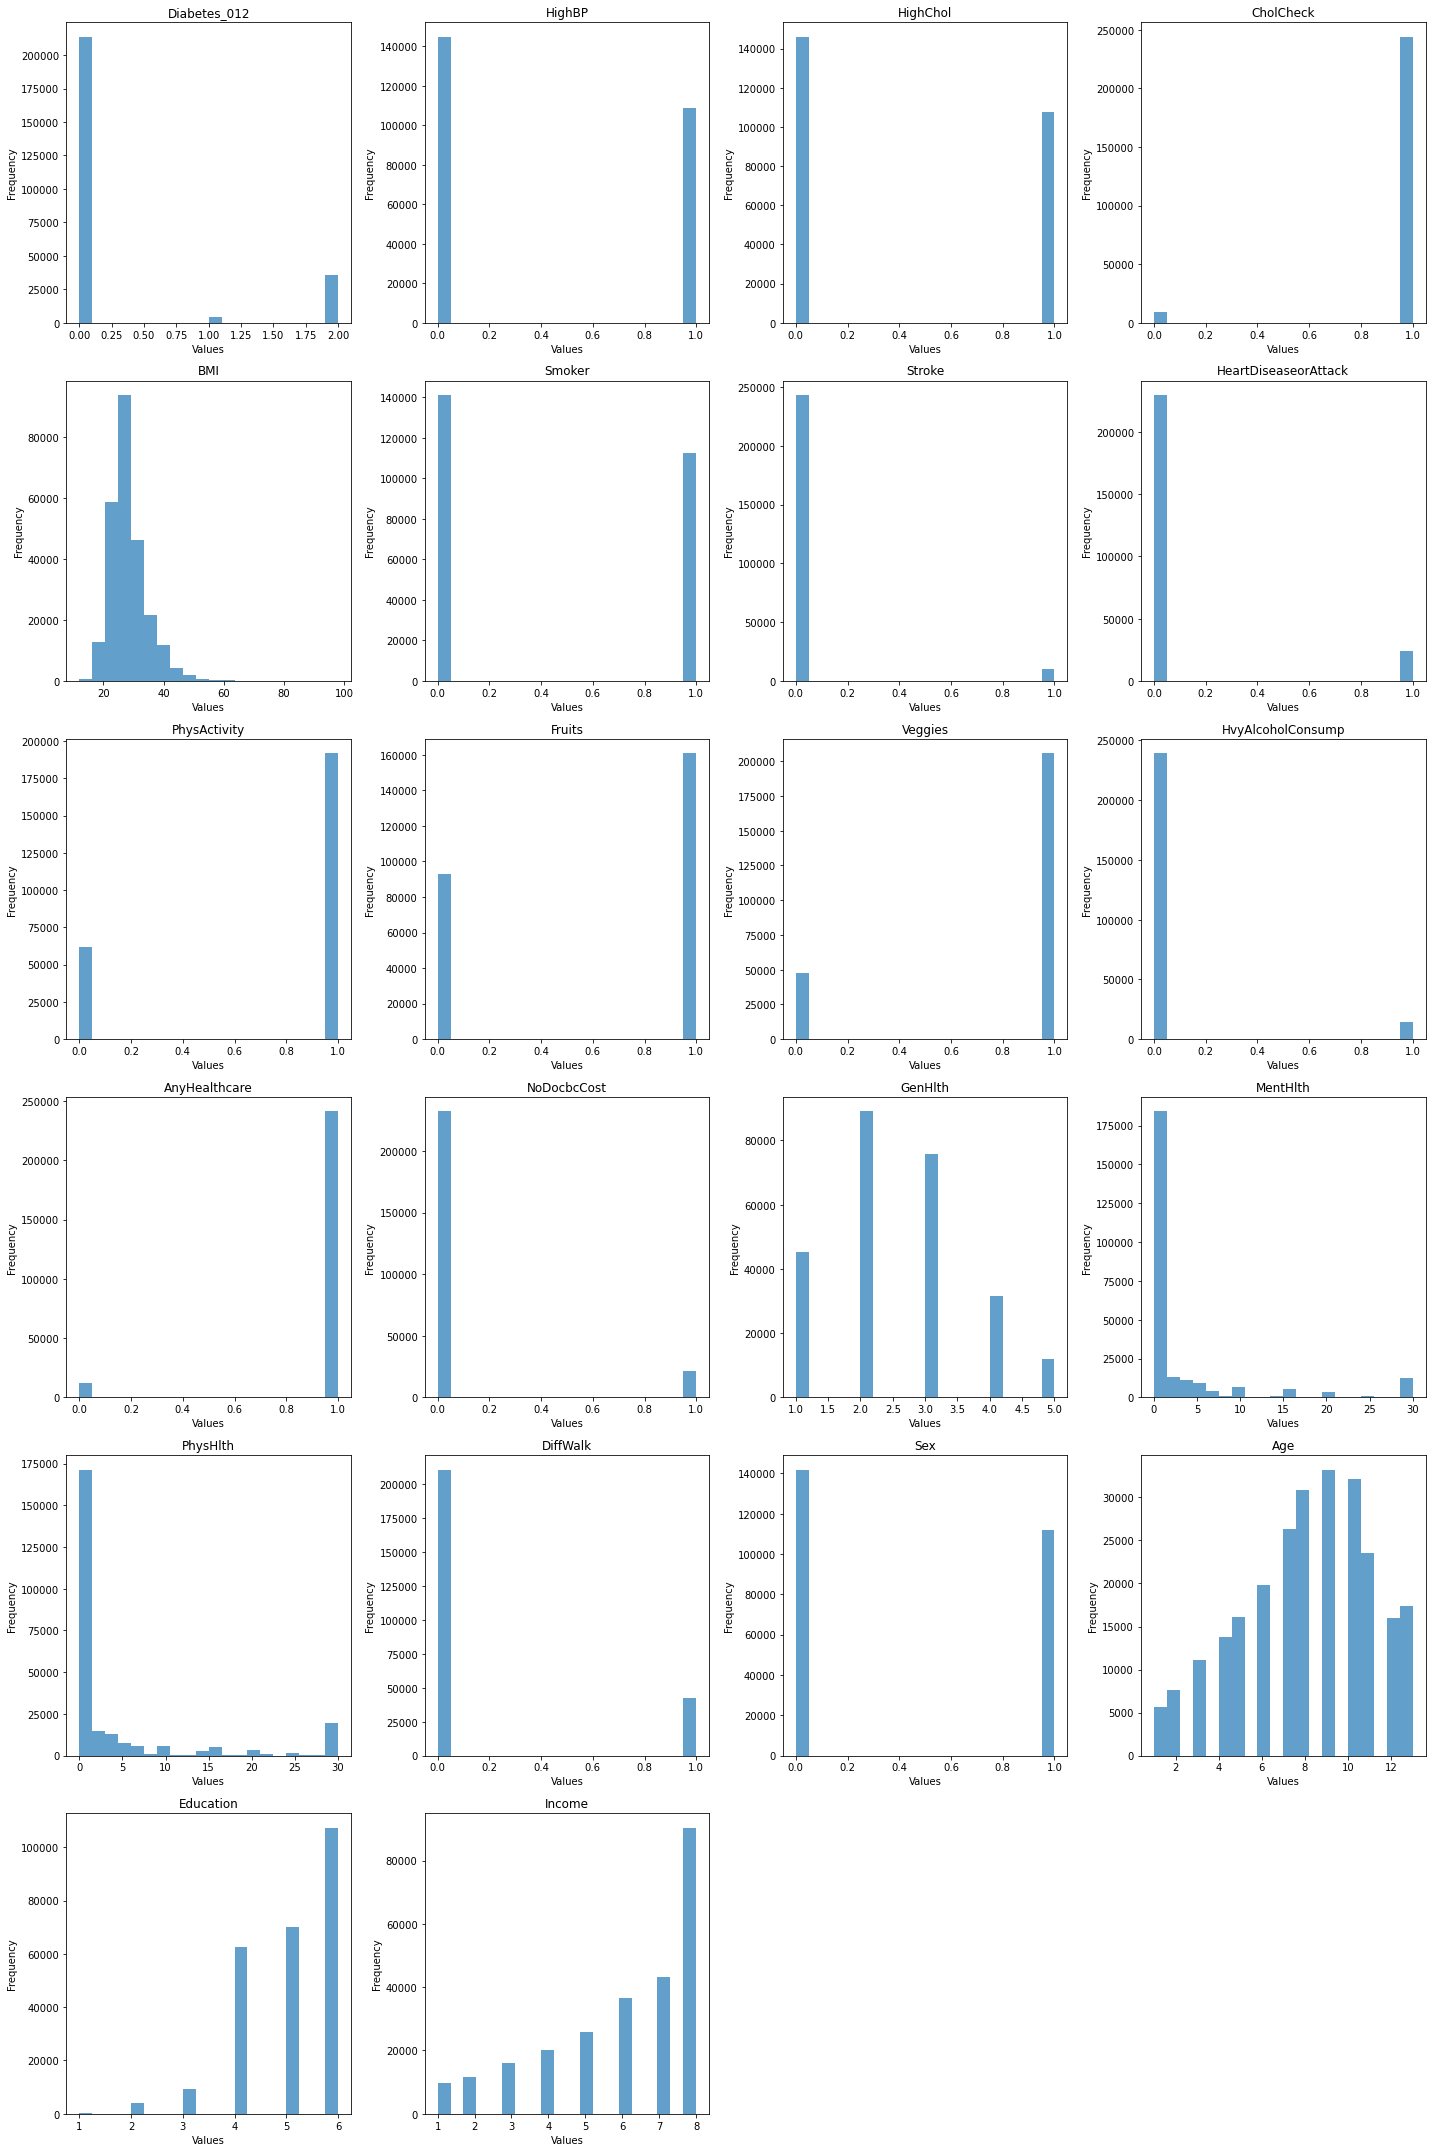

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate the number of rows and columns based on the number of columns in the DataFrame
num_columns = len(diabetes_df_cleaned.columns)
num_rows = math.ceil(num_columns / 4)  # Assuming 4 plots per row

# Create subplots for each variable
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot the histogram
for i, column in enumerate(diabetes_df_cleaned.columns):
    axs[i].hist(diabetes_df_cleaned[column], bins=20, alpha=0.7)
    axs[i].set_title(column)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

# Hide the remaining empty subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [9]:
#Rename Diabetes_012 and combined Diabetes_012 values for sake of consistency
diabetes_df_cleaned = diabetes_df_cleaned.rename(columns = {"Diabetes_012": "Diabetes_01"})
diabetes_df_cleaned["Diabetes_01"].replace(2, 1, inplace = True)

In [10]:
diabetes_df_cleaned.describe()

,Diabetes_01,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.364355,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


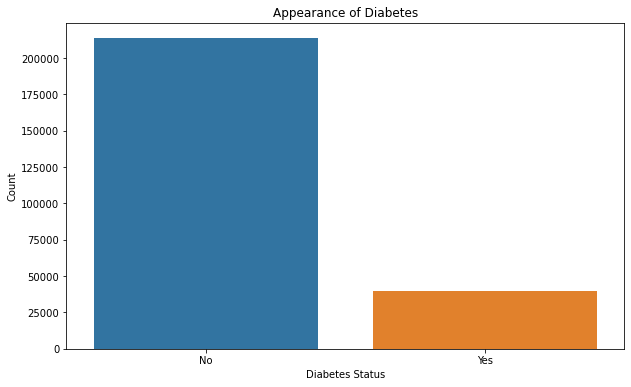

In [11]:
plt.figure(figsize = (10,6))
sns.barplot(x = diabetes_df_cleaned["Diabetes_01"].value_counts().index, y = diabetes_df_cleaned["Diabetes_01"].value_counts())
plt.title("Appearance of Diabetes")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

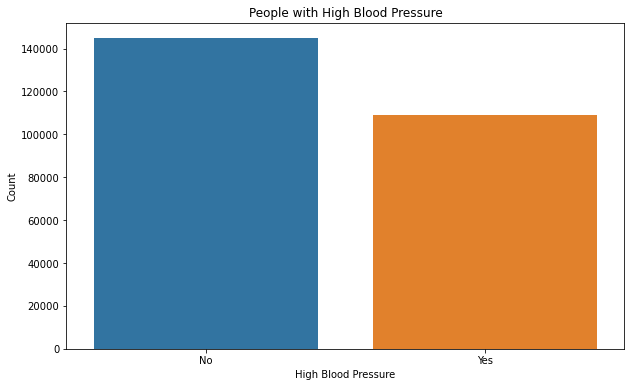

In [12]:
plt.figure(figsize = (10,6))
sns.barplot(x = diabetes_df_cleaned["HighBP"].value_counts().index, y = diabetes_df_cleaned["HighBP"].value_counts())
plt.title("People with High Blood Pressure")
plt.xlabel("High Blood Pressure")
plt.ylabel("Count")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

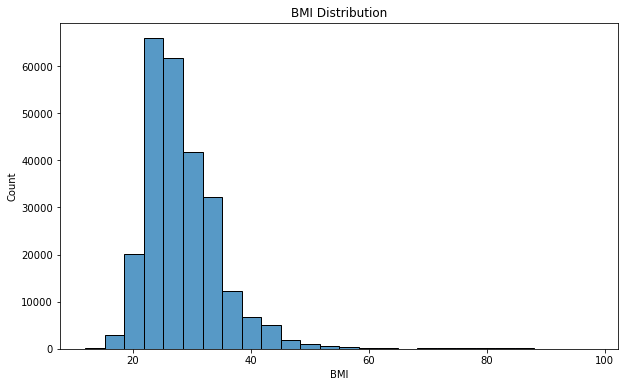

In [13]:
plt.figure(figsize = (10,6))
sns.histplot(data = diabetes_df_cleaned, x = "BMI", bins = 26)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

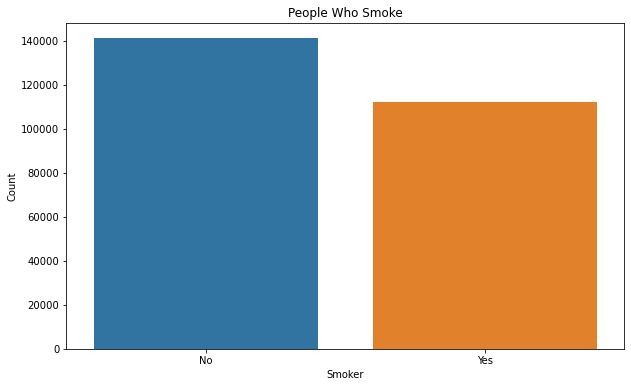

In [14]:
plt.figure(figsize = (10,6))
sns.barplot(x = diabetes_df_cleaned["Smoker"].value_counts().index, y = diabetes_df_cleaned["Smoker"].value_counts())
plt.title("People Who Smoke")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

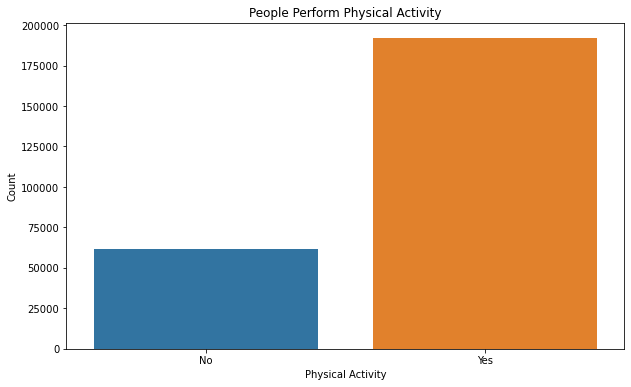

In [15]:
plt.figure(figsize = (10,6))
sns.barplot(x = diabetes_df_cleaned["PhysActivity"].value_counts().index, y = diabetes_df_cleaned["PhysActivity"].value_counts())
plt.title("People Perform Physical Activity")
plt.xlabel("Physical Activity")
plt.ylabel("Count")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

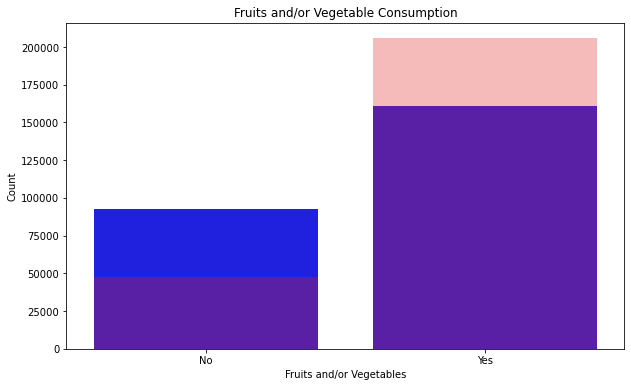

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(x = diabetes_df_cleaned["Fruits"].value_counts().index, y = diabetes_df_cleaned["Fruits"].value_counts(), color = "blue")
sns.barplot(x = diabetes_df_cleaned["Veggies"].value_counts().index, y = diabetes_df_cleaned["Veggies"].value_counts(), color = "red", alpha = 0.3)
plt.title("Fruits and/or Vegetable Consumption")
plt.xlabel("Fruits and/or Vegetables")
plt.ylabel("Count")
plt.xticks([0,1], ["No", "Yes"])
plt.show()
# Want to figure out a better way to do this rather than using a text box to describe it

In the above graph, we can interpert the purple as the count of people who: for the bar with "No", are the people who don't consume fruits and vegetables and, for the "Yes", as people who consume both fruits and vegetables. We see that more people don't consume fruits than people who don't consume vegetables as seen by the blue graph, and for the people that consume fruits or vegetables, more people tend to consume vegetables if they consume vegetables or fruit.

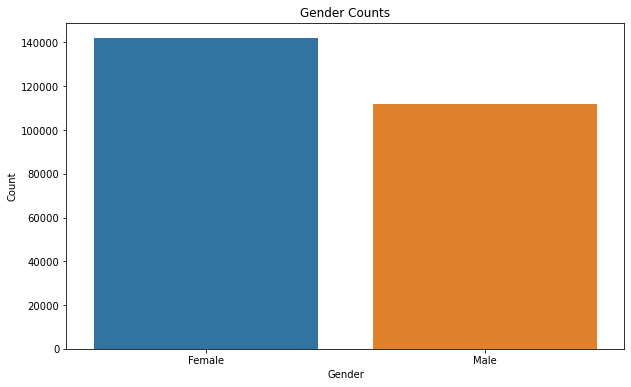

In [17]:
plt.figure(figsize = (10,6))
sns.barplot(x = diabetes_df_cleaned["Sex"].value_counts().index, y = diabetes_df_cleaned["Sex"].value_counts())
plt.title("Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0,1], ["Female", "Male"])
plt.show()

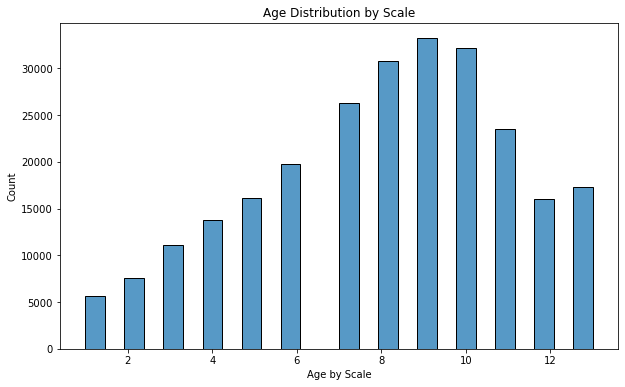

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(data = diabetes_df_cleaned, x = "Age", bins = 26)
plt.title("Age Distribution by Scale")
plt.xlabel("Age by Scale")
plt.ylabel("Count")
plt.show()
# Maybe change the scale before final project

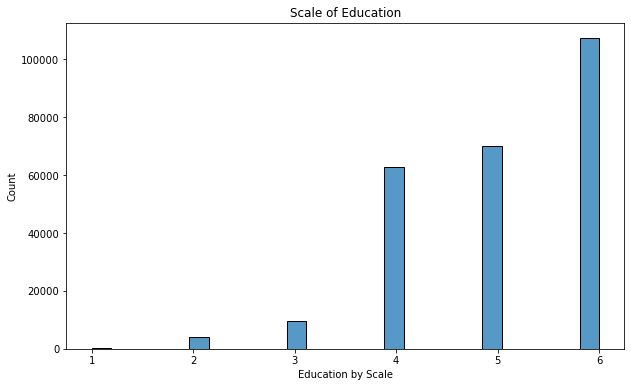

In [19]:
plt.figure(figsize = (10,6))
sns.histplot(data = diabetes_df_cleaned, x = "Education", bins = 26)
plt.title("Scale of Education")
plt.xlabel("Education by Scale")
plt.ylabel("Count")
plt.show()
# Maybe change/define the scale before final project

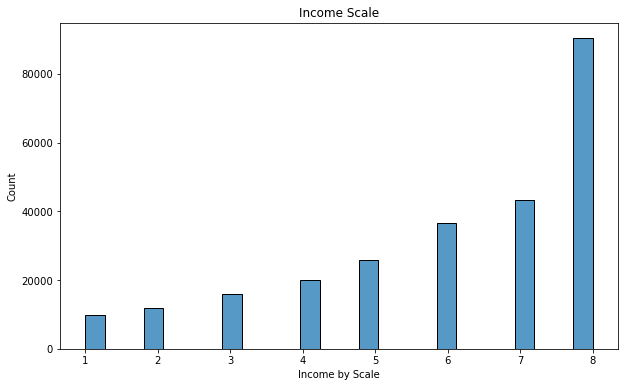

In [20]:
plt.figure(figsize = (10,6))
sns.histplot(data = diabetes_df_cleaned, x = "Income", bins = 26)
plt.title("Income Scale")
plt.xlabel("Income by Scale")
plt.ylabel("Count")
plt.show()
# Maybe change/define the scale before final project

## Removing Outliers

We want to get rid of outliers regarding each variable. We could get rid of outliers overall(i.e. we remove a row if one of the variables has an outlier), but that would remove a great chunk of this dataset(253k samples to 85k samples). So it's just better to clean out outliers in respect to each variable and have series for more data.

In [ ]:
age_no_outliers = diabetes_df_cleaned['Age']
Q1 = age_no_outliers.quantile(0.25)
Q3 = age_no_outliers.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_no_outliers = age_no_outliers[(age_no_outliers >= lower_bound) & (age_no_outliers <= upper_bound)]
age_no_outliers = age_no_outliers

bmi_no_outliers = diabetes_df_cleaned['BMI']
Q1 = bmi_no_outliers.quantile(0.25)
Q3 = bmi_no_outliers.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bmi_no_outliers = bmi_no_outliers[(bmi_no_outliers >= lower_bound) & (bmi_no_outliers <= upper_bound)]
bmi_no_outliers = bmi_no_outliers
bmi_no_outliers

income_no_outliers = diabetes_df_cleaned['Income']
Q1 = income_no_outliers.quantile(0.25)
Q3 = income_no_outliers.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
income_no_outliers = income_no_outliers[(income_no_outliers >= lower_bound) & (income_no_outliers <= upper_bound)]
income_no_outliers = income_no_outliers

## Correlations between the quantitative variables

It's helpful to learn the correlations between the quantitative variables to learn their relationships

In [ ]:
age_bmi_df = diabetes_df_cleaned[['Age', 'BMI']]
Q1 = age_bmi_df.quantile(0.25)
Q3 = age_bmi_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
age_bmi_df = age_bmi_df[(age_bmi_df >= lower_bound) & (age_bmi_df <= upper_bound)]
age_bmi_df = age_bmi_df.dropna()

x = age_bmi_df['Age']
y = age_bmi_df['BMI']
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('BMI')
b1, b0 = np.polyfit(np.array(x), np.array(y), 1)
plt.plot(np.array(x), b1 * np.array(x) + b0, color='r')
plt.show()

There seems to be no correlation between Age and BMI

In [ ]:
df = diabetes_df_cleaned[['Age', 'Income']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df = df[(df >= lower_bound) & (df <= upper_bound)]
df = df.dropna()

x = df['Age']
y = df['Income']
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Income')
b1, b0 = np.polyfit(np.array(x), np.array(y), 1)
plt.plot(np.array(x), b1 * np.array(x) + b0, color='r')
plt.show()

There seems to be some negative correlation between age and income? Perhaps this can be explained with retirement as people get older

In [ ]:
df = diabetes_df_cleaned[['BMI', 'Income']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df = df[(df >= lower_bound) & (df <= upper_bound)]
df = df.dropna()

x = df['BMI']
y = df['Income']
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('Income')
b1, b0 = np.polyfit(np.array(x), np.array(y), 1)
plt.plot(np.array(x), b1 * np.array(x) + b0, color='r')
plt.show()

There is a negative correlation between Income and BMI. This is kind of expected, as those with lower income may be forced to live under unhealthier conditions

### Section 2 of EDA - Dataset 2
Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Get means, medians, and spread
statistics = df_cleaned.describe()
print(statistics)
df_cleaned

In [ ]:
# Create subplots for each variable
fig, axs = plt.subplots(nrows=1, ncols=len(df_cleaned.columns), figsize=(20, 5))

# Iterate through each column and plot the histogram without normalization
for i, column in enumerate(df_cleaned.columns):
    axs[i].hist(df_cleaned[column], bins=20, alpha=0.7, density=False)  # Set density to False
    axs[i].set_title(column)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Removing Outliers

In [ ]:
# Get rid of outliers for quantitative variables based on IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df_no_outliers = df_cleaned[(df_cleaned >= lower_bound) & (df_cleaned <= upper_bound)]
df_no_outliers

Turns out there's no outliers

## Linear model

It's a linear model to find the correlation between variables and the progression of diabetes. Through this, we may know which features correlate with the rate of Diabetes the most

In [ ]:
from sklearn import linear_model
X = df_cleaned[['AGE', 'BMI', 'BP', 'S1','S2','S3','S4','S5','S6',]]
y = df_cleaned['Y']
model = linear_model.LinearRegression()
model.fit(X, y)
print(model.coef_)

From this, we can see that BMI, total cholesterol and total trygliceride are the variables that correlate the most with Diabetes getting worse. It's possible that they are variables that correlate with the diabetes rate as well 

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?


There are some ethical concerns regarding equitability we must consider. There may be variations between diabetes rates between gender and ages below 21. There are also some claims that there are some differences between diabetes rates between ethnicities(such as this:<a name="diabetes-ethnicity"></a>[<sup>1</sup>](#dia-ethnicity)). It’s not clear why this correlation is reported, but it’s possibly something to consider when searching for a dataset. Certain disabilities can also have an impact on diabetes rate and ideally we’d want a dataset that accounts for those disabilities too. It’s also ideal to consider a dataset that contains a diverse set of class and wealth levels too, as poorer people may be forced to live in worse living conditions that may cause a higher risk of diabetes. Therefore, it’s important to sample a diverse set of people in our dataset to account for some or all of these differences, if possible. We can check for such datasets either by looking at the description of the dataset and gauge how diverse the dataset is based off of that, or checking if age, gender, ethnicity, disabilities, and class are variables in the dataset and doing EDA to make sure the distribution of those variables are diverse. If we cannot find data that accounts for all of these differences, then we must add disclaimers stating so in order to prevent misinterpretation.

Even if we have a diverse dataset, though, there may still be some issues with equitability. If we don’t have enough variables in the dataset, we can get some correlations that lead us to identify false causes and false conclusions. For example, let’s say we exclude BMI for the sake of this scenario. Certain population groups may just so happen to have higher BMIs on average for a variety of reasons. BMI could be the actual reason why they typically have a higher risk for diabetes, but if we excluded BMI, we may falsely conclude that they naturally are more likely to suffer from diabetes, which can be problematic. False conclusions can lead to treatments that can be harmful to people or groups. To solve this, we would have to consider datasets that have many different diverse variables. Lastly, with an ideal dataset that considers all of these problems, the only major issue would be privacy. We wouldn’t want hospitals to release sensitive information from patients without their knowledge or proper consent, for instance. It has to be sourced from willing participants.

1. <a name="dia-ethnicity"></a> [^](#diabetes-ethnicity) *Diabetes UK*. https://www.diabetes.org.uk/diabetes-the-basics/types-of-diabetes/type-2/diabetes-ethnicity

# Team Expectations 

* *Agree to a weekly meeting time to discuss overall team progress and next steps*
* *Communicate in advance if you are unable to finish your weekly tasks for any reasons or come to the meetings*
* *Try your best to contribute during meetings and ensure work is evenly divided*
* *Teammates will also help create an environment that everyone is comfortable voicing their opinions in and will use their skills / knowledge to help each other*
* *Be open to giving and receiving feedback to/from other team members*
* *Make sure to fill in the peer evaluations honestly*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/4  |  6:00 PM | Determined means of Communication  | Discuss about questions and answers regarding previous project review| 
| 2/9  |  4:00 PM |  Individually think about questions about project proposal | Discuss research question, Browse and select datasets | 
| 2/10  | 4:00 PM  | Finish project proposal | Discuss and finalize project proposal   |
| 2/23  | 5:00 PM  | Review Feedback on Project Proposal | Decide on Fixes for Project Proposal; Discuss New Datasets   |
| 2/25  | 3:00 PM  | Start Fixes on Project Proposal, Continue looking for datasets | Finalize Fixes for Project Proposal, Finalize Datasets to use and Finalize Data Checkpoint
| 3/08  | 5:00 PM  | Finalize wrangling/EDA; Begin Analysis (Diabetes Statisics)| Discuss/edit Analysis; Discuss group understanding of data and analysis methods |
| 3/12  | 6:00 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss and correct analysis  |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |